# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [450]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Leer conjunto de datos y primer vistazo

In [451]:
df = pd.read_csv("data/agaricus-lepiota.data")

df.head(5)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [452]:
# imprimimos los nombres de las columnas
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [453]:
# imprimos el número de valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


p: 2 valores únicos
x: 6 valores únicos
s: 4 valores únicos
n: 10 valores únicos
t: 2 valores únicos
p.1: 9 valores únicos
f: 2 valores únicos
c: 2 valores únicos
n.1: 2 valores únicos
k: 12 valores únicos
e: 2 valores únicos
e.1: 5 valores únicos
s.1: 4 valores únicos
s.2: 4 valores únicos
w: 9 valores únicos
w.1: 9 valores únicos
p.2: 1 valores únicos
w.2: 4 valores únicos
o: 3 valores únicos
p.3: 5 valores únicos
k.1: 9 valores únicos
s.3: 6 valores únicos
u: 7 valores únicos


In [454]:
# renombramos las colunmas para que sean más descriptivas
df.columns = [
    'clase',                   # class
    'forma_sombrero',          # cap-shape
    'superficie_sombrero',     # cap-surface
    'color_sombrero',          # cap-color
    'magulladuras',            # bruises
    'olor',                    # odor
    'union_laminas',           # gill-attachment
    'espaciado_laminas',       # gill-spacing
    'tamano_laminas',          # gill-size
    'color_laminas',           # gill-color
    'forma_tallo',             # stalk-shape
    'raiz_tallo',              # stalk-root
    'superficie_tallo_arriba_anillo',  # stalk-surface-above-ring
    'superficie_tallo_abajo_anillo',   # stalk-surface-below-ring
    'color_tallo_arriba_anillo',       # stalk-color-above-ring
    'color_tallo_abajo_anillo',        # stalk-color-below-ring
    'tipo_velo',              # veil-type
    'color_velo',             # veil-color
    'numero_anillos',         # ring-number
    'tipo_anillo',            # ring-type
    'color_esporas',          # spore-print-color
    'poblacion',              # population
    'habitat',                # habitat
]


| Nombre de columna                    | Valores posibles (código = significado)                                                                 |
|-------------------------------------|----------------------------------------------------------------------------------------------------------|
| clase                      | e=comestible, p=venenoso                      |
| forma_sombrero                      | b = campana, c = cónica, x = convexa, f = plana, k = con protuberancia, s = hundida                      |
| superficie_sombrero                 | f = fibrosa, g = con ranuras, y = escamosa, s = lisa                                                     |
| color_sombrero                      | n = marrón, b = beige, c = canela, g = gris, r = verde, p = rosado, u = púrpura, e = rojo, w = blanco, y = amarillo |
| magulladuras                        | t = sí, f = no                                                                                           |
| olor                                | a = almendra, l = anís, c = creosota, y = a pescado, f = fétido, m = mohoso, n = ninguno, p = picante, s = especiado |
| union_laminas                       | a = adherida, d = descendente, f = libre, n = entallada                                                  |
| espaciado_laminas                   | c = cerrado, w = apiñado, d = separado                                                                   |
| tamano_laminas                      | b = ancho, n = estrecho                                                                                   |
| color_laminas                       | k = negro, n = marrón, b = beige, h = chocolate, g = gris, r = verde, o = naranja, p = rosado, u = púrpura, e = rojo, w = blanco, y = amarillo |
| forma_tallo                         | e = ensanchado, t = afilado                                                                              |
| raiz_tallo                          | b = bulboso, c = maza, e = igual, r = enraizado, ? = faltante                   |
| superficie_tallo_arriba_anillo     | f = fibrosa, y = escamosa, k = sedosa, s = lisa                                                          |
| superficie_tallo_abajo_anillo      | f = fibrosa, y = escamosa, k = sedosa, s = lisa                                                          |
| color_tallo_arriba_anillo          | n = marrón, b = beige, c = canela, g = gris, o = naranja, p = rosado, e = rojo, w = blanco, y = amarillo |
| color_tallo_abajo_anillo           | n = marrón, b = beige, c = canela, g = gris, o = naranja, p = rosado, e = rojo, w = blanco, y = amarillo |
| tipo_velo                           | p = parcial                                                                               |
| color_velo                          | n = marrón, o = naranja, w = blanco, y = amarillo                                                        |
| numero_anillos                      | n = ninguno, o = uno, t = dos                                                                            |
| tipo_anillo                         | c = telaraña, e = efímero, f = ensanchado, l = grande, n = ninguno, p = colgante, s = envainado, z = zona |
| color_esporas                       | k = negro, n = marrón, b = beige, h = chocolate, r = verde, o = naranja, u = púrpura, w = blanco, y = amarillo |
| poblacion                           | a = abundante, c = agrupada, n = numerosa, s = dispersa, v = varias, y = solitaria                      |
| habitat                             | g = pasto, l = hojas, m = praderas, p = senderos, u = urbano, w = desechos, d = bosque                   |


In [455]:
# imprimimos el número de valores faltantes por columna
df.isnull().sum()

clase                             0
forma_sombrero                    0
superficie_sombrero               0
color_sombrero                    0
magulladuras                      0
olor                              0
union_laminas                     0
espaciado_laminas                 0
tamano_laminas                    0
color_laminas                     0
forma_tallo                       0
raiz_tallo                        0
superficie_tallo_arriba_anillo    0
superficie_tallo_abajo_anillo     0
color_tallo_arriba_anillo         0
color_tallo_abajo_anillo          0
tipo_velo                         0
color_velo                        0
numero_anillos                    0
tipo_anillo                       0
color_esporas                     0
poblacion                         0
habitat                           0
dtype: int64

Podemos ver a simple vista que no hay valores faltantes, pero mirando el "diccionario" de variables hay una columna llamada "s.1" que ahora se llama "raiz_tallo" tiene una variable llamada "?" que corresponde a valor faltante. Procedemos a imprimir la cantidad de valores "?" hay en el dataset, más necesario en la columna "raiz_tallo".

In [456]:
df.isin(['?']).sum()

clase                                0
forma_sombrero                       0
superficie_sombrero                  0
color_sombrero                       0
magulladuras                         0
olor                                 0
union_laminas                        0
espaciado_laminas                    0
tamano_laminas                       0
color_laminas                        0
forma_tallo                          0
raiz_tallo                        2480
superficie_tallo_arriba_anillo       0
superficie_tallo_abajo_anillo        0
color_tallo_arriba_anillo            0
color_tallo_abajo_anillo             0
tipo_velo                            0
color_velo                           0
numero_anillos                       0
tipo_anillo                          0
color_esporas                        0
poblacion                            0
habitat                              0
dtype: int64

In [457]:
df['raiz_tallo'].value_counts()

raiz_tallo
b    3776
?    2480
e    1119
c     556
r     192
Name: count, dtype: int64

Confirmamos que hay 2480 valores faltantes en la columna "raiz_tallo" y los convertimos a "nan".

In [458]:
df['raiz_tallo'] = df['raiz_tallo'].replace('?', np.nan)

In [459]:
df["raiz_tallo"].value_counts(dropna=False)

raiz_tallo
b      3776
NaN    2480
e      1119
c       556
r       192
Name: count, dtype: int64

### Exploración de datos

In [460]:
# Descripción del conjunto de datos, estándard.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   clase                           8123 non-null   object
 1   forma_sombrero                  8123 non-null   object
 2   superficie_sombrero             8123 non-null   object
 3   color_sombrero                  8123 non-null   object
 4   magulladuras                    8123 non-null   object
 5   olor                            8123 non-null   object
 6   union_laminas                   8123 non-null   object
 7   espaciado_laminas               8123 non-null   object
 8   tamano_laminas                  8123 non-null   object
 9   color_laminas                   8123 non-null   object
 10  forma_tallo                     8123 non-null   object
 11  raiz_tallo                      5643 non-null   object
 12  superficie_tallo_arriba_anillo  8123 non-null   

In [461]:
# Información sobre el tipo de datos de cada feature.
print("Todos los datos son de tipo 'object', es decir son categóricos.")

Todos los datos son de tipo 'object', es decir son categóricos.


#### Calcular el número de nulos de cada feature

In [462]:
# Igual que otras veces, una linea, contar los nulos por variable.
print("El dataset no contiene valores nulos en ninguna de sus columnas, pero en la columna 'raiz_tallo' hay 248 valores que son '?' \nque representan datos perdidos y los hemos reemplazado por NaN.")

El dataset no contiene valores nulos en ninguna de sus columnas, pero en la columna 'raiz_tallo' hay 248 valores que son '?' 
que representan datos perdidos y los hemos reemplazado por NaN.


#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [463]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).

features = []
valores_unicos = []

for col in df.columns:
    features.append(col)
    valores_unicos.append(list(df[col].unique()))

resumen = pd.DataFrame({
    'feature': features,
    'n_values': valores_unicos
})

print(resumen)

resumen.to_csv("data/resumen_features.csv", index=False)
print("El nuevo dataframe ha sido guardado en 'resumen_features.csv'.")



                           feature                              n_values
0                            clase                                [e, p]
1                   forma_sombrero                    [x, b, s, f, k, c]
2              superficie_sombrero                          [s, y, f, g]
3                   color_sombrero        [y, w, g, n, e, p, b, u, c, r]
4                     magulladuras                                [t, f]
5                             olor           [a, l, p, n, f, c, y, s, m]
6                    union_laminas                                [f, a]
7                espaciado_laminas                                [c, w]
8                   tamano_laminas                                [b, n]
9                    color_laminas  [k, n, g, p, w, h, u, e, b, r, y, o]
10                     forma_tallo                                [e, t]
11                      raiz_tallo                     [c, e, b, r, nan]
12  superficie_tallo_arriba_anillo                 

#### Tratar aquellos valores que entendamos que sean nulos


Decidimos eliminar las filas que contengan NaN en la columna "raiz_tallo".

In [464]:
# Imputaciones. eliminamos las filas con valores NaN en la columna 'raiz_tallo'
df = df.dropna(subset=['raiz_tallo'])

In [465]:
df["raiz_tallo"].value_counts(dropna=False)

raiz_tallo
b    3776
e    1119
c     556
r     192
Name: count, dtype: int64

Además, observamos que la columna "tipo_velo" sólo tiene 1 variable, lo que significa que tiene la misma distribución en todas las clases y no afectará a la clasificación. Decidimos borrar esta columna.

In [466]:
df.drop(columns=['tipo_velo'], inplace=True)

Después de eliminar las 2480 filas con valores nulos y la columna "tipo_velo", el dataset queda de la siguiente manera:

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 8113
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   clase                           5643 non-null   object
 1   forma_sombrero                  5643 non-null   object
 2   superficie_sombrero             5643 non-null   object
 3   color_sombrero                  5643 non-null   object
 4   magulladuras                    5643 non-null   object
 5   olor                            5643 non-null   object
 6   union_laminas                   5643 non-null   object
 7   espaciado_laminas               5643 non-null   object
 8   tamano_laminas                  5643 non-null   object
 9   color_laminas                   5643 non-null   object
 10  forma_tallo                     5643 non-null   object
 11  raiz_tallo                      5643 non-null   object
 12  superficie_tallo_arriba_anillo  5643 non-null   objec

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [468]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['clase'])
y = df['clase']

# usamos LabelEncoder para convertir las variables categóricas en números
from sklearn.preprocessing import LabelEncoder

X_enc = X.apply(LabelEncoder().fit_transform)
y_enc = LabelEncoder().fit_transform(y)

mi = mutual_info_classif(X_enc, y_enc, discrete_features=True)

mi_df = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_df)


olor                              0.595813
color_esporas                     0.404292
tipo_anillo                       0.321006
superficie_tallo_arriba_anillo    0.294472
superficie_tallo_abajo_anillo     0.283434
color_tallo_arriba_anillo         0.212416
color_tallo_abajo_anillo          0.193432
forma_tallo                       0.190573
color_laminas                     0.147685
color_sombrero                    0.135361
magulladuras                      0.097203
poblacion                         0.076137
habitat                           0.069679
raiz_tallo                        0.067573
espaciado_laminas                 0.040435
tamano_laminas                    0.022386
forma_sombrero                    0.012061
numero_anillos                    0.008365
superficie_sombrero               0.003147
union_laminas                     0.003079
color_velo                        0.001366
dtype: float64


Tras imprimir las correlaciones de cada característica con la target llegamos a las siguientes conclusiones:

Variables con mayor correlación:

| Variables                          | MI Score | Interpretación                                                                                                    |
| -------------------------------- | -------- | ----------------------------------------------------------------------------------------------------------------- |
| `olor`                           | 0.5958   | Es, por mucho, la variable más informativa. Tiene una fuerte asociación con si el hongo es venenoso o comestible. |
| `color_esporas`                  | 0.4043   | Bastante informativa. Ayuda a diferenciar bien las clases.                                                        |
| `tipo_anillo`                    | 0.3210   | Tiene una asociación moderada con la clase.                                                                       |
| `superficie_tallo_arriba_anillo` | 0.2945   | También relevante.                                                                                                |
| `superficie_tallo_abajo_anillo`  | 0.2834   | Similar a la anterior, aporta buena información.                                                                  |


Variables con MI Score cercano a 0:

- color_velo
- union_laminas
- superficie_sombrero
- numero_anillos

Procedemos a eliminar estas 4 columnas con MI Score cercano a 0 para reducir la dimensionalidad de dataset. 

In [469]:
df = df.drop(columns=['color_velo', 'union_laminas', 'superficie_sombrero', 'numero_anillos'])

In [470]:
df.head(5)

,clase,forma_sombrero,color_sombrero,magulladuras,olor,espaciado_laminas,tamano_laminas,color_laminas,forma_tallo,raiz_tallo,superficie_tallo_arriba_anillo,superficie_tallo_abajo_anillo,color_tallo_arriba_anillo,color_tallo_abajo_anillo,tipo_anillo,color_esporas,poblacion,habitat
0,e,x,y,t,a,c,b,k,e,c,s,s,w,w,p,n,n,g
1,e,b,w,t,l,c,b,n,e,c,s,s,w,w,p,n,n,m
2,p,x,w,t,p,c,n,n,e,e,s,s,w,w,p,k,s,u
3,e,x,g,f,n,w,b,k,t,e,s,s,w,w,e,n,a,g
4,e,x,y,t,a,c,b,n,e,c,s,s,w,w,p,k,n,g


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 8113
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   clase                           5643 non-null   object
 1   forma_sombrero                  5643 non-null   object
 2   color_sombrero                  5643 non-null   object
 3   magulladuras                    5643 non-null   object
 4   olor                            5643 non-null   object
 5   espaciado_laminas               5643 non-null   object
 6   tamano_laminas                  5643 non-null   object
 7   color_laminas                   5643 non-null   object
 8   forma_tallo                     5643 non-null   object
 9   raiz_tallo                      5643 non-null   object
 10  superficie_tallo_arriba_anillo  5643 non-null   object
 11  superficie_tallo_abajo_anillo   5643 non-null   object
 12  color_tallo_arriba_anillo       5643 non-null   objec

Imprimimos la distribución de cada clase en cada columna con respecto a la variable target "clase".

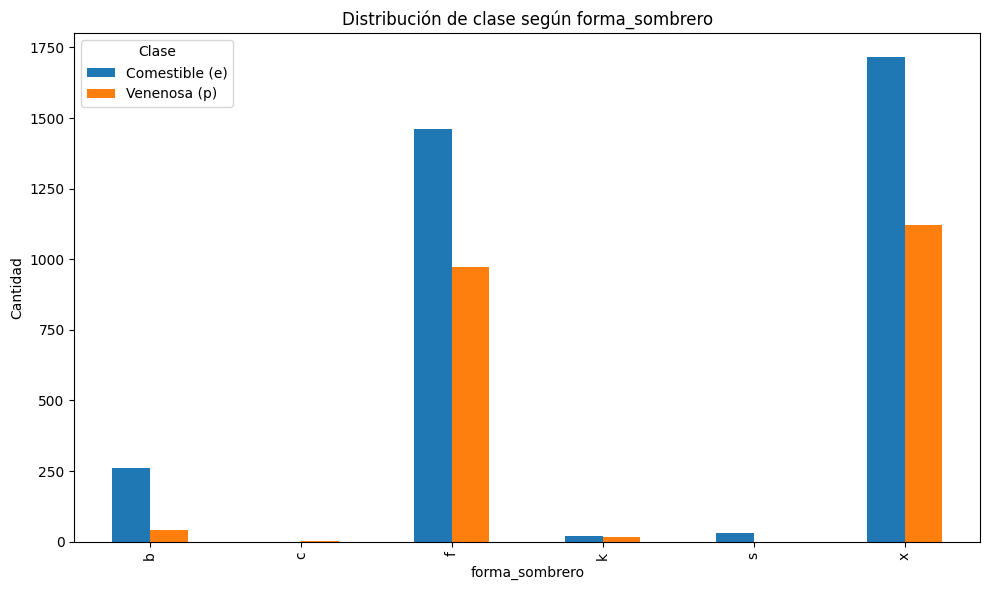

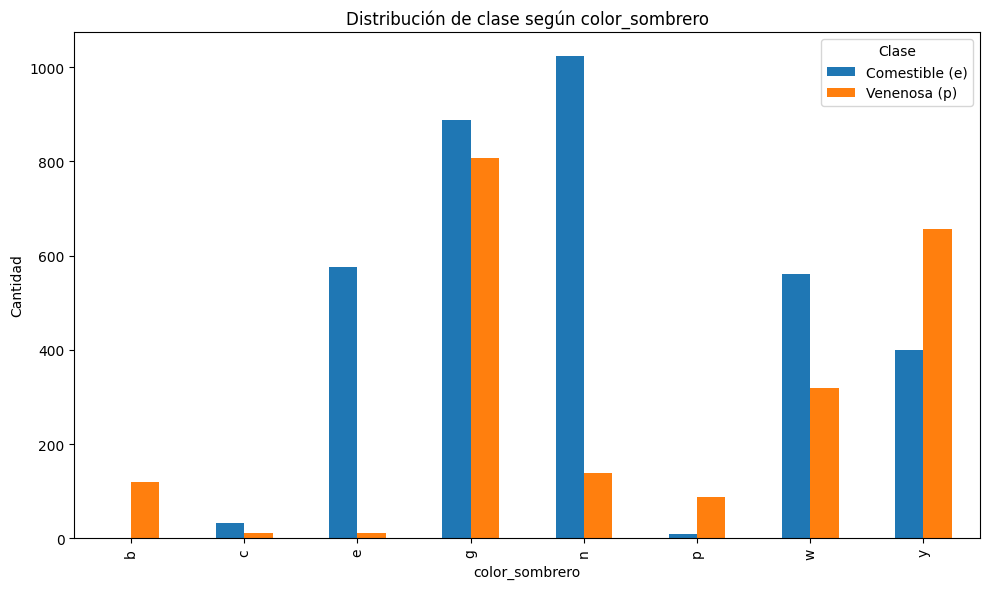

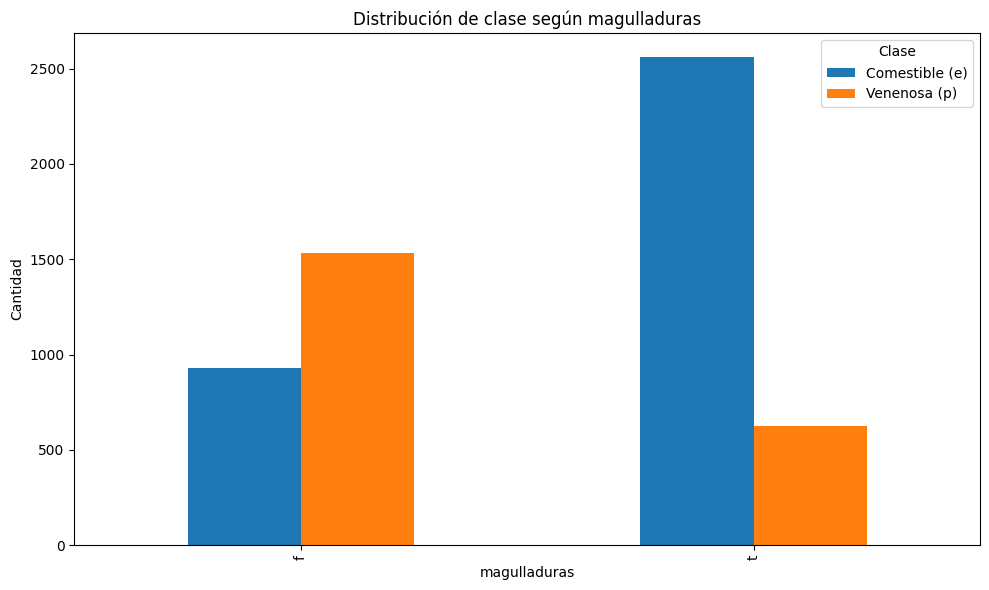

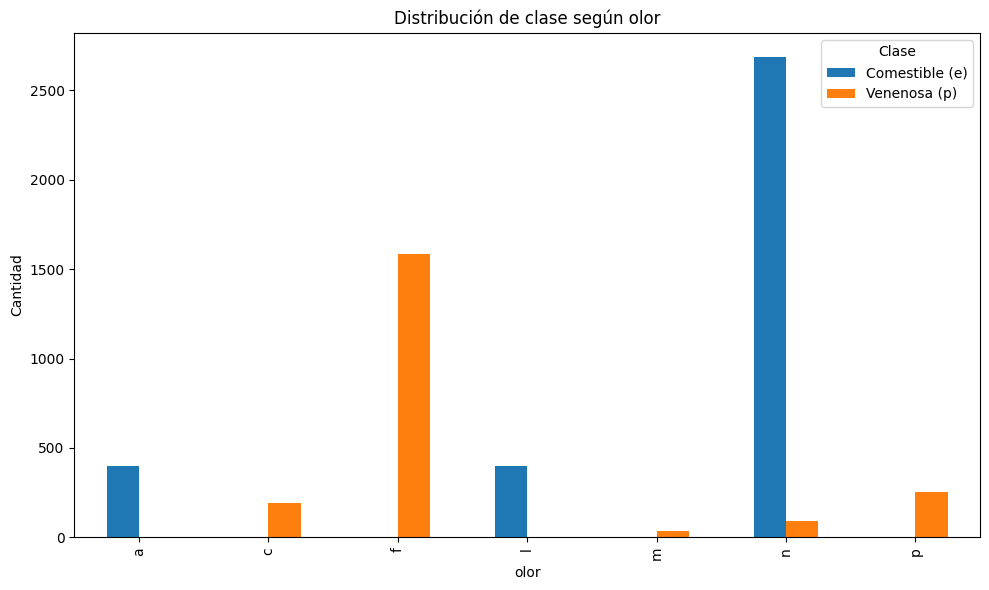

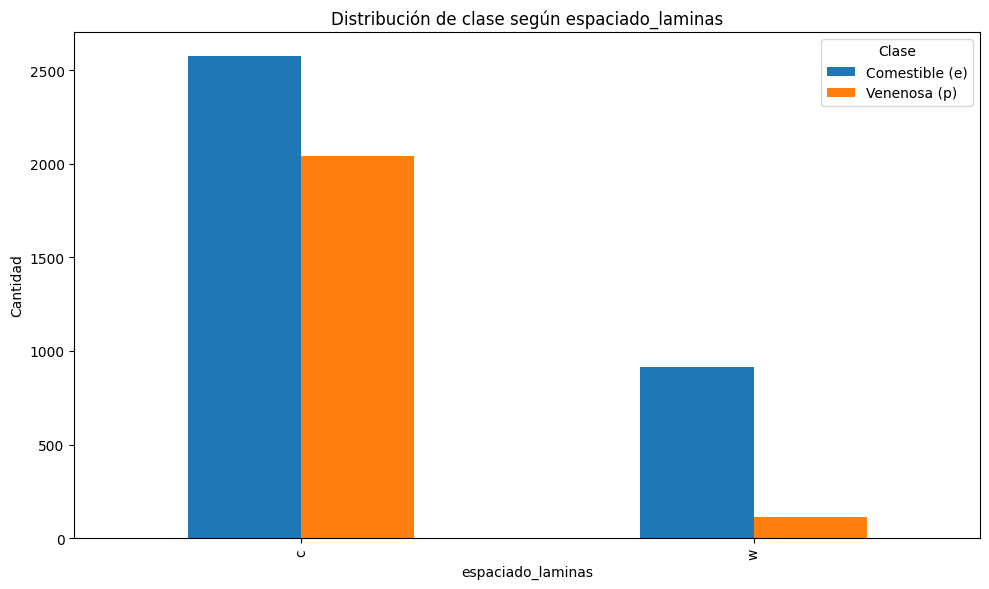

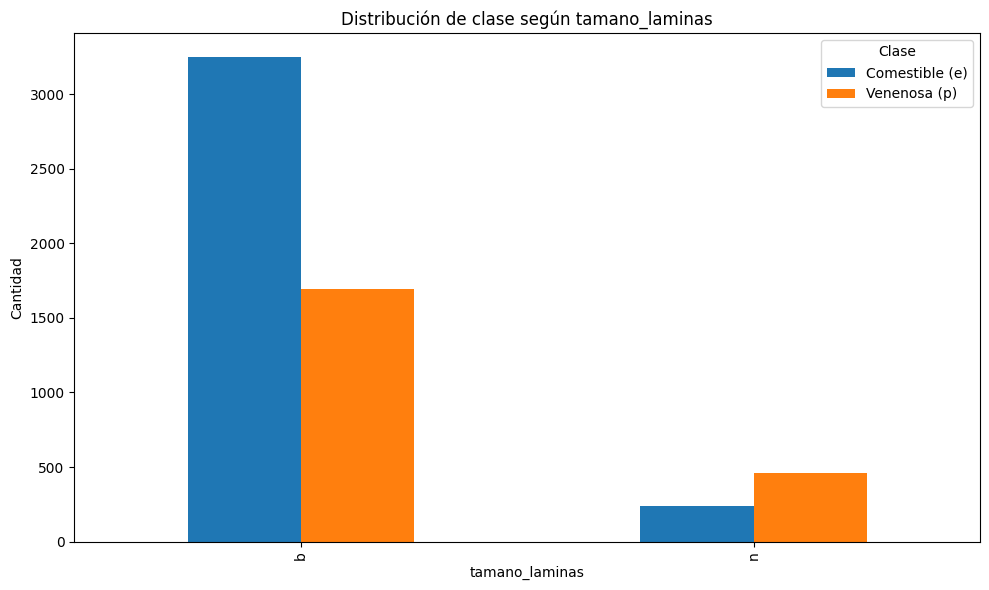

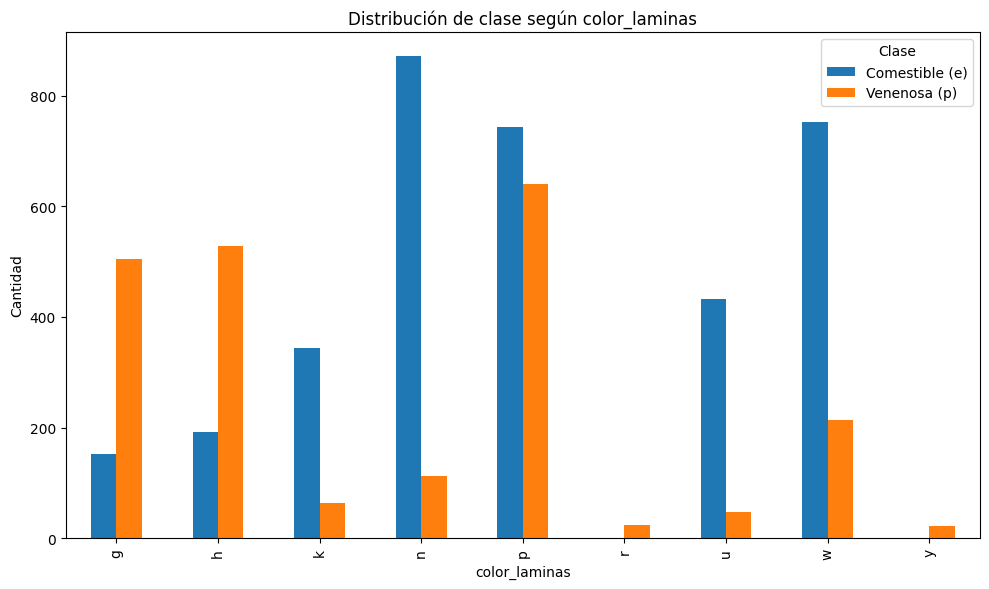

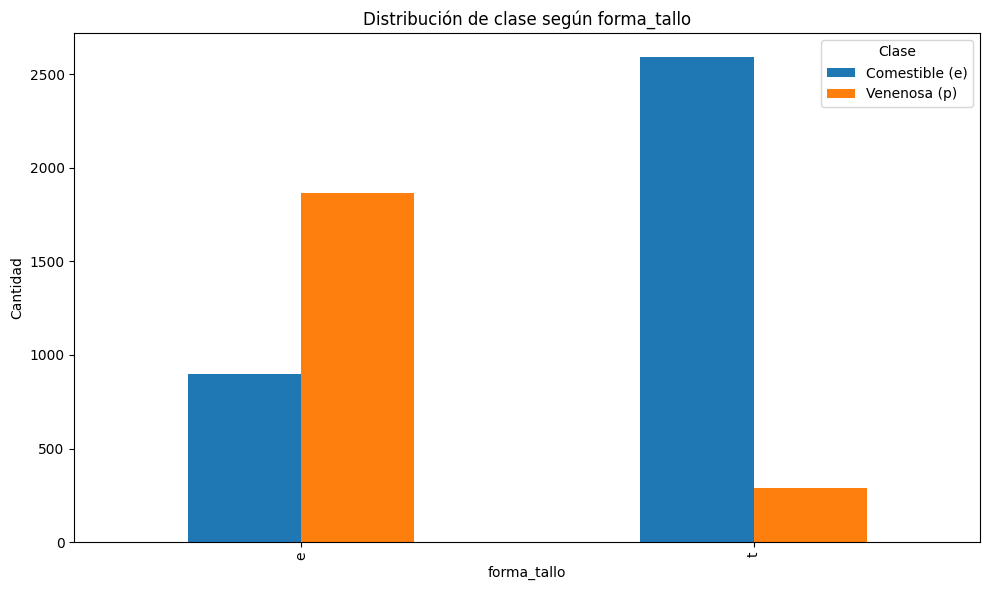

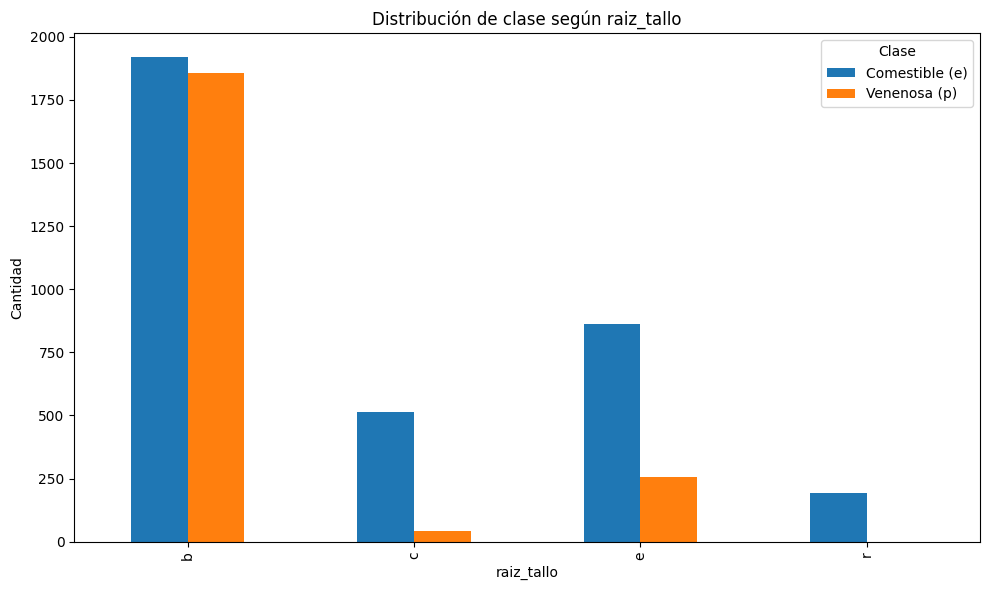

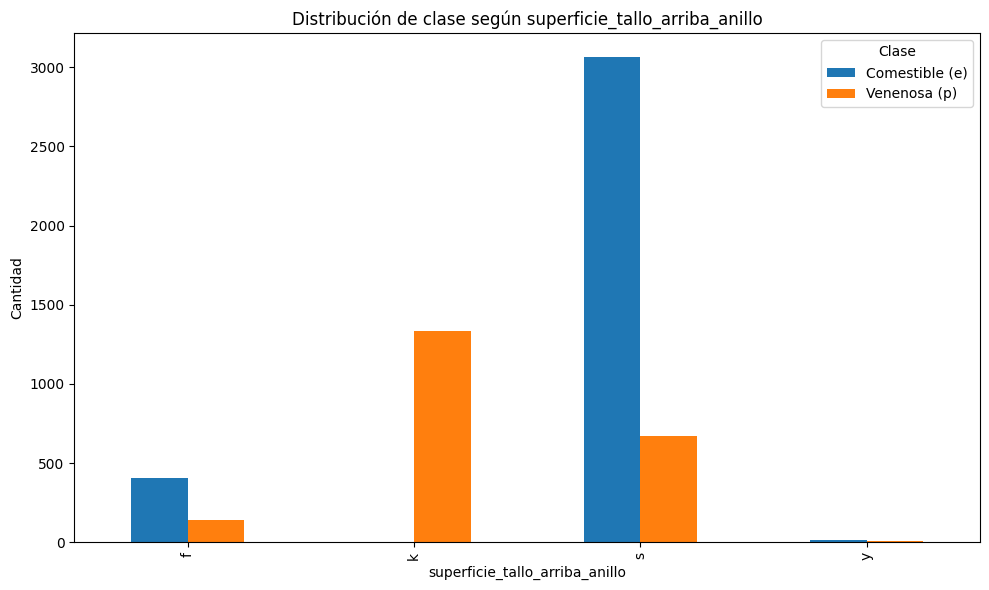

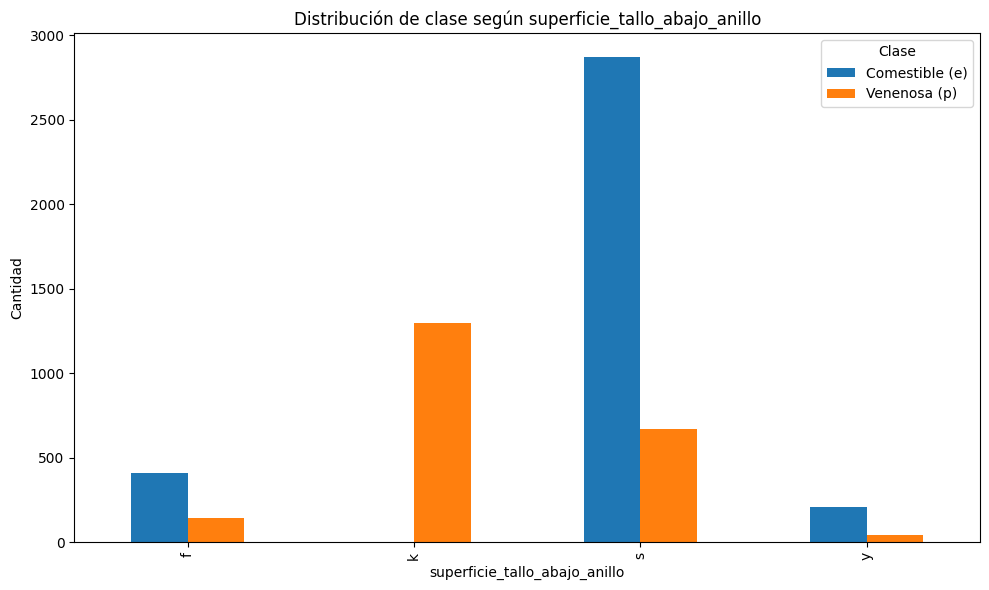

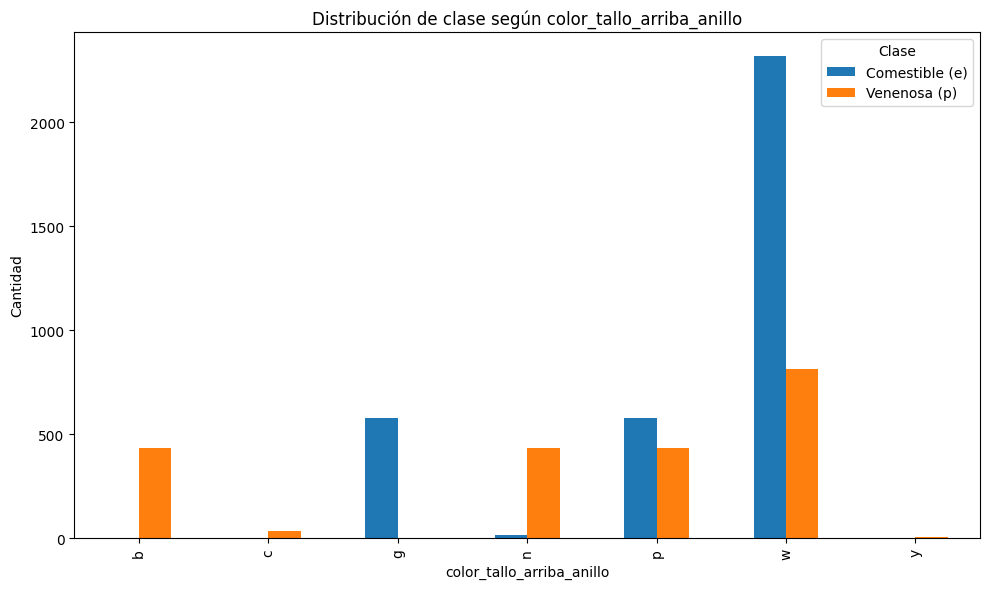

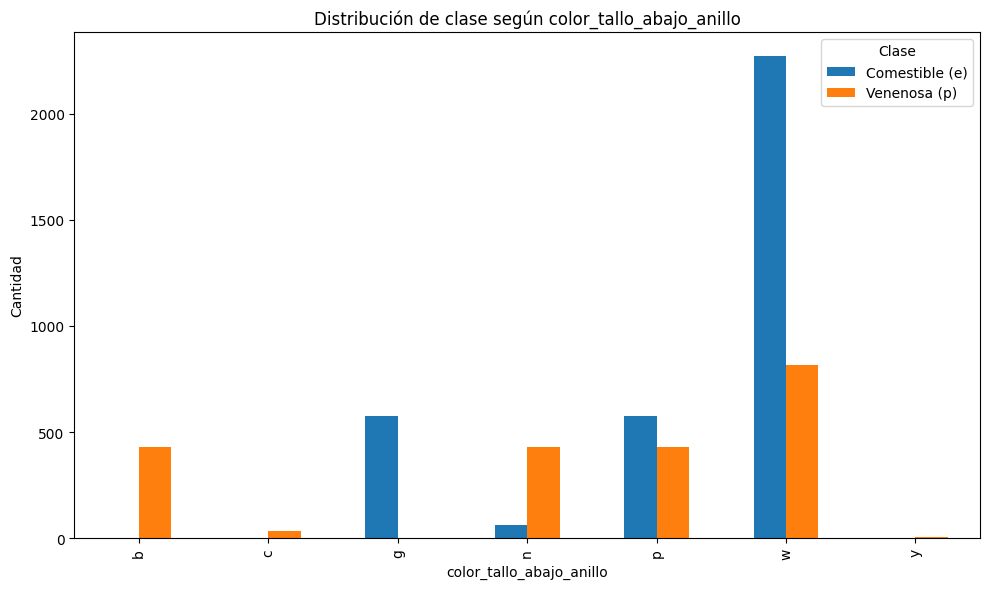

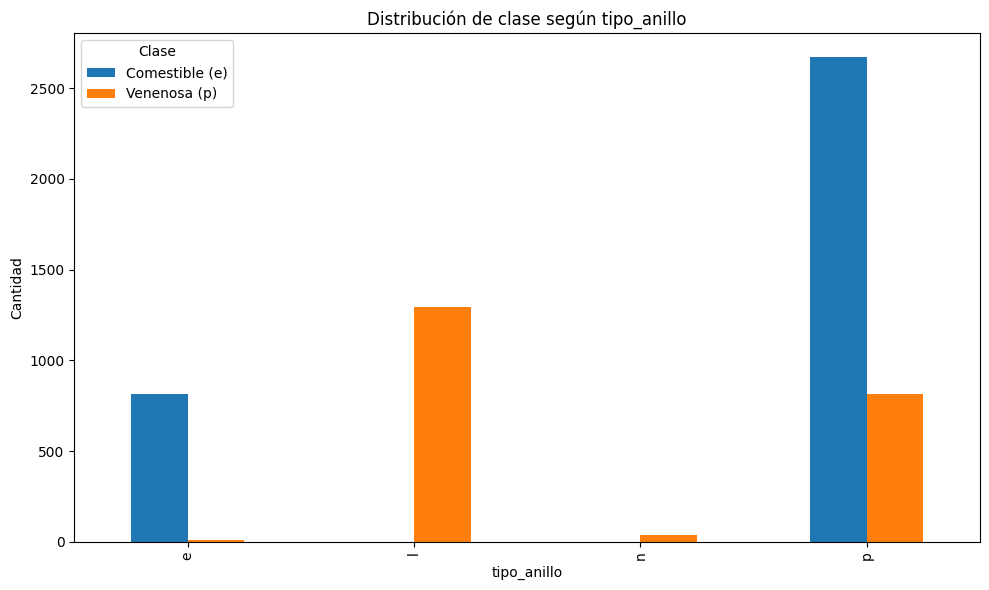

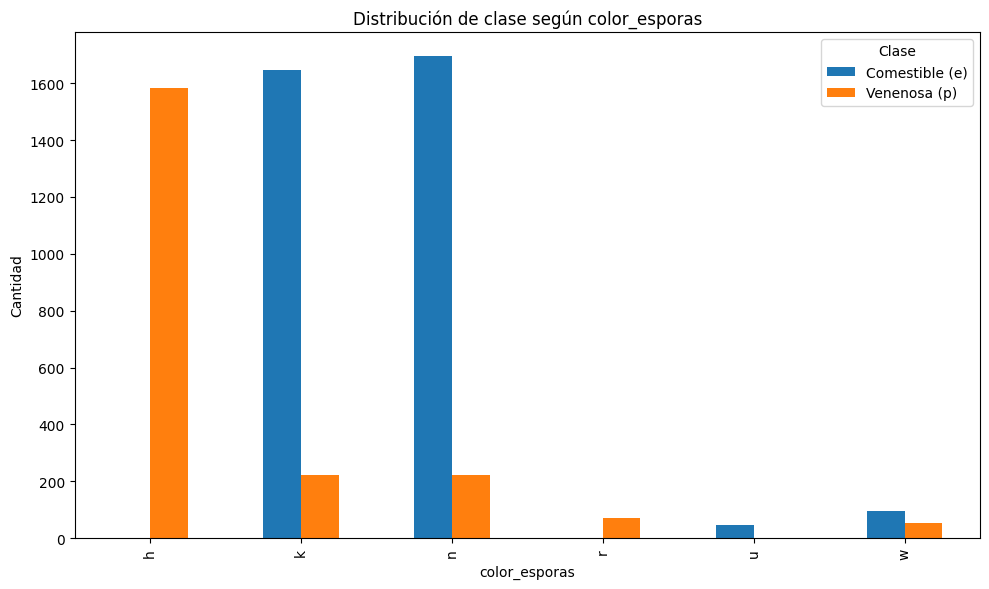

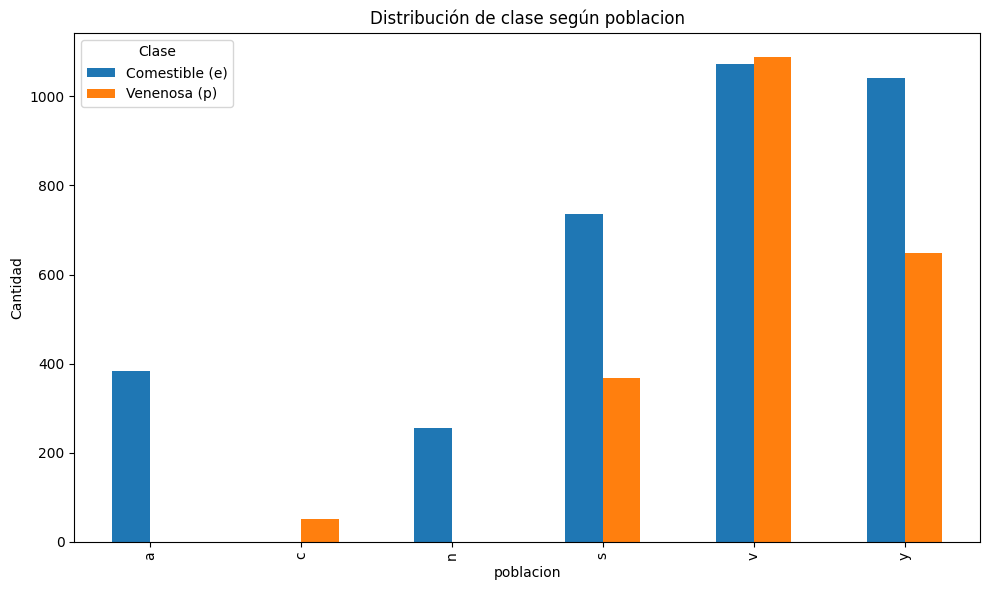

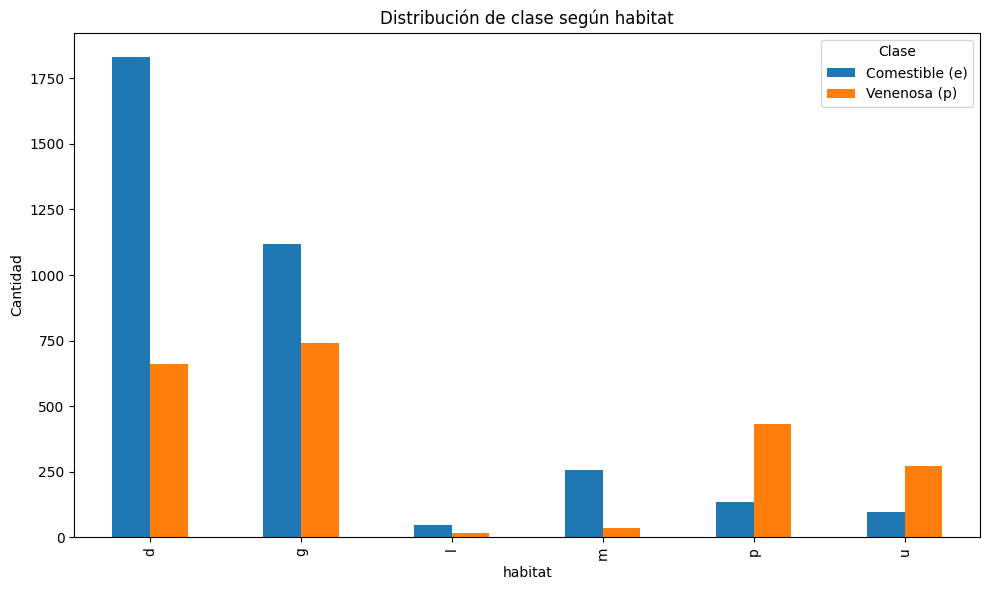

In [472]:
predictoras = df.columns.drop('clase')

for col in predictoras:
    conteo = pd.crosstab(df[col], df['clase'])
    conteo.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribución de clase según {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.legend(title='Clase', labels=['Comestible (e)', 'Venenosa (p)'])
    plt.tight_layout()
    plt.show()

Imprimimos las 2 categorías más predominantes de cada columna con respecto a la target "clase", para saber las características más cómunes de las setas comestibles y las venenosas.

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 8113
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   clase                           5643 non-null   object
 1   forma_sombrero                  5643 non-null   object
 2   color_sombrero                  5643 non-null   object
 3   magulladuras                    5643 non-null   object
 4   olor                            5643 non-null   object
 5   espaciado_laminas               5643 non-null   object
 6   tamano_laminas                  5643 non-null   object
 7   color_laminas                   5643 non-null   object
 8   forma_tallo                     5643 non-null   object
 9   raiz_tallo                      5643 non-null   object
 10  superficie_tallo_arriba_anillo  5643 non-null   object
 11  superficie_tallo_abajo_anillo   5643 non-null   object
 12  color_tallo_arriba_anillo       5643 non-null   objec

In [474]:
import pandas as pd

# Lista de columnas predictoras
predictoras = df.columns.drop('clase')

# Diccionarios para almacenar resultados por clase
resultados_e = []
resultados_p = []

for col in predictoras:
    conteos = df.groupby('clase')[col].value_counts()

    # Top 2 para clase 'e'
    top2_e = conteos['e'].nlargest(2)
    for rank, (categoria, cantidad) in enumerate(top2_e.items(), start=1):
        resultados_e.append({
            'Columna': col,
            f'Top {rank} Categoría': categoria,
            f'Top {rank} Frecuencia': cantidad
        })

    # Top 2 para clase 'p'
    top2_p = conteos['p'].nlargest(2)
    for rank, (categoria, cantidad) in enumerate(top2_p.items(), start=1):
        resultados_p.append({
            'Columna': col,
            f'Top {rank} Categoría': categoria,
            f'Top {rank} Frecuencia': cantidad
        })

# Convertimos a DataFrames
tabla_e = pd.DataFrame(resultados_e).groupby('Columna').first().reset_index()
tabla_p = pd.DataFrame(resultados_p).groupby('Columna').first().reset_index()

# Mostramos las dos tablas
print("🍄 Tabla: Comestibles (Clase 'e')")
display(tabla_e)

print("\n☠️  Tabla: Venenosos (Clase 'p')")
display(tabla_p)


🍄 Tabla: Comestibles (Clase 'e')


,Columna,Top 1 Categoría,Top 1 Frecuencia,Top 2 Categoría,Top 2 Frecuencia
0,color_esporas,n,1696.0,k,1648.0
1,color_laminas,n,872.0,w,752.0
2,color_sombrero,n,1024.0,g,888.0
3,color_tallo_abajo_anillo,w,2272.0,g,576.0
4,color_tallo_arriba_anillo,w,2320.0,g,576.0
5,espaciado_laminas,c,2576.0,w,912.0
6,forma_sombrero,x,1716.0,f,1460.0
7,forma_tallo,t,2592.0,e,896.0
8,habitat,d,1832.0,g,1120.0
9,magulladuras,t,2560.0,f,928.0



☠️  Tabla: Venenosos (Clase 'p')


,Columna,Top 1 Categoría,Top 1 Frecuencia,Top 2 Categoría,Top 2 Frecuencia
0,color_esporas,h,1584.0,n,224.0
1,color_laminas,p,640.0,h,528.0
2,color_sombrero,g,808.0,y,656.0
3,color_tallo_abajo_anillo,w,815.0,b,432.0
4,color_tallo_arriba_anillo,w,815.0,b,432.0
5,espaciado_laminas,c,2043.0,w,112.0
6,forma_sombrero,x,1123.0,f,972.0
7,forma_tallo,e,1867.0,t,288.0
8,habitat,g,740.0,d,660.0
9,magulladuras,f,1532.0,t,623.0


### Conclusiones sobre las setas comestibles vs venenosas:

### 🍄 Comestibles: clase = e

Las setas comestibles suelen tener las siguientes características predominantes:

- **Color predominante** en esporas, láminas y sombrero es el **marrón** (n), lo cual sugiere tonos terrosos naturales.
- **Tallo** con superficie **blanca** arriba y abajo del anillo, lo que indica uniformidad de color en el cuerpo del hongo.
- **Sombrero** generalmente de forma **convexa** (x) o **plana** (f).
- **Láminas** con **espaciado cerrado** (c) y de **tamaño ancho** (b).
- **Tallo** con forma **afilada** (t), no ensanchada.
- **Magulladuras frecuentes** (t), lo que puede implicar tejidos más blandos.
- **Olor** más común es **ninguno** (n), lo cual puede asociarse a seguridad.
- **Tipo de anillo** del tipo **colgante** (p) o **efímero** (e).
- Su **hábitat** más habitual es el **bosque** (d) o **pasto** (g).
- **Población** suele ser **variada** (v) o **solitaria** (y).
- **Raíz del tallo** frecuentemente **bulbosa** (b) o **igual** (e).

---

### ☠️ Venenosas: clase = p

Las setas venenosas presentan un patrón distinto:

- **Color de esporas** predominante es **chocolate** (h), muy poco común en comestibles.
- **Láminas** tienden a ser de colores **rosados** (p) o **chocolate** (h), que pueden parecer más llamativos.
- **Sombrero** usualmente **convexo** (x) o **plano** (f), igual que algunas comestibles, pero con **colores más brillantes** como **gris** (g) o **amarillo** (y).
- **Tallo** presenta **superficie sedosa** (k) y **color blanco**, a menudo junto con **color beige** debajo del anillo.
- **Magulladuras poco frecuentes** (f), lo cual puede reflejar tejidos más firmes.
- **Olor** típico es **fétido** (f) o **picante** (p), lo cual podría servir como señal de advertencia.
- **Tipo de anillo** más común es **grande** (l) o **colgante** (p), con presencia más destacada.
- **Raíz del tallo** suele ser **bulbosa** (b).
- **Hábitat** preferido es **pasto** (g) o **bosque** (d), lo cual se solapa con las comestibles.
- **Población** igualmente **variada** (v) o **solitaria** (y), lo que no es diferenciador claro.

---

## ✅ Conclusión general

- Los **colores terrosos y oscuros** (marrón, negro) y la **ausencia de olor** están más ligados a las **setas comestibles**.
- Las **setas venenosas** tienden a tener **olores intensos**, **colores más brillantes o inusuales**, y **superficies sedosas o escamosas**.
- **Magulladuras** y tipo de **tallo/anillo** también son buenos indicadores: los comestibles se magullan más y tienen tallos afilados; los venenosos son más firmes, con anillos prominentes.


#### Separar entre variables predictoras y variables a predecir

In [475]:
# La variable que trata de predecir este conjunto de datos es 'class'.
y = df["clase"]
X = df.drop(columns=["clase"])

#### Codificar correctamente las variables categóricas a numéricas

In [476]:
# One Hot Encoder (una linea).
# con drop_first=True evitamos la multicolinealidad.
X_encoded = pd.get_dummies(X, drop_first=True)
X = X_encoded


# codificamos las etiquetas de la target a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded


#### Train test split

In [477]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [478]:
# escalamos los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Antes de pasar a PCA, decido usar .get_dummies para hacer One Hot Encoding sobre las columnas de predicción, y usar LabelEncoder para la columna target. Ademas uso StandardScaler para escalar los datos para realmente usar los componentes principales. 

## PCA

**¿Qué es PCA?**: El PCA es una técnica de machine learning no supervisado muy eficaz para visualizar y explorar conjuntos de datos de alta dimensión, o datos con muchas características, ya que puede identificar fácilmente tendencias, patrones o valores atípicos. Esta ténica se usa en preprocesamiento de datos para el Machine Learning extrayendo las características más informativas, evitando la dimensionalidad, multicolinealidad* y la complejidad de la tabla. Además minimiza y/o elimina el sobreajuste.

*multicolinealidad: cuando 2 o más variables independientes están altamente correlacionadas entre sí.

[Saber más](https://www.ibm.com/es-es/think/topics/principal-component-analysis#:~:text=El%20an%C3%A1lisis%20de%20componentes%20principales%2C%20o%20PCA%2C%20reduce%20el%20n%C3%BAmero,parte%20de%20la%20informaci%C3%B3n%20original.)

**PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

/var/folders/8z/sqgf56vx7qsg7m3r0lpcg4lw0000gn/T/ipykernel_1221/3055569381.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


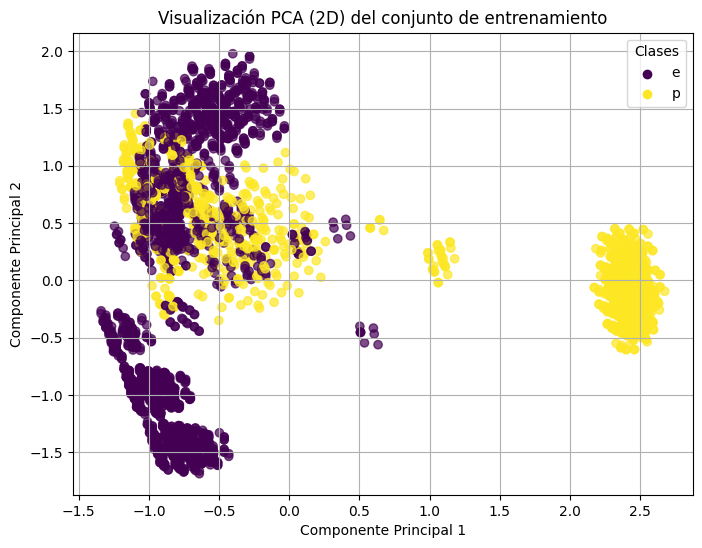

In [479]:
# creamos un PCA con 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# lo visualizamos en un scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# creamos la leyenda con los nombres originales y colores correspondientes
# extraemos la lista de colores usados para cada clase codificada
cmap = plt.cm.get_cmap('viridis')
colors = [cmap(i / (len(label_encoder.classes_) - 1)) for i in range(len(label_encoder.classes_))]

for i, class_name in enumerate(label_encoder.classes_):
    plt.scatter([], [], color=colors[i], label=class_name)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA (2D) del conjunto de entrenamiento')

plt.legend(title='Clases')
plt.grid(True)
plt.show()



In [480]:
import pandas as pd

# creamos un DataFrame con los coeficientes de cada variable en cada componente
loadings = pd.DataFrame(pca.components_.T, index=X_train.columns, columns=['PC1', 'PC2'])

print(loadings)


                                       PC1       PC2
forma_sombrero_c                 -0.000225  0.000411
forma_sombrero_f                  0.028811 -0.091511
forma_sombrero_k                  0.001611  0.001665
forma_sombrero_s                 -0.002222  0.002353
forma_sombrero_x                 -0.004325  0.053393
color_sombrero_c                  0.001182  0.001729
color_sombrero_e                 -0.048293 -0.137481
color_sombrero_g                  0.082551 -0.063471
color_sombrero_n                 -0.088840 -0.022846
color_sombrero_p                 -0.007042  0.009647
color_sombrero_w                 -0.061559  0.164368
color_sombrero_y                  0.126974  0.041767
magulladuras_t                   -0.246300 -0.244929
olor_c                           -0.012592  0.030257
olor_f                            0.293600 -0.003713
olor_l                           -0.028397  0.046312
olor_m                            0.004374  0.001567
olor_n                           -0.203772 -0.

En resumen, las 2 características principales son la combinación de todas las columnas, y son 2 nuevas variables que resumen la mayor parte de la información original, facilitando ver patrones o separaciones entre las clases en menos dimensiones.

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

Usamos las variables tras PCA para reducir dimensionalidad, tras escalar con StandardScaler.

In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Definir el clasificador y el número de árboles (estimadores)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train_pca, y_train)

# 3. Predecir las etiquetas en el conjunto de test
y_pred = clf.predict(X_test_pca)

# 4. Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy en el conjunto de test: {accuracy:.4f}')


Accuracy en el conjunto de test: 0.9640


In [482]:
import numpy as np

print("Clases en train:", np.unique(y_train, return_counts=True))
print("Clases en test:", np.unique(y_test, return_counts=True))


Clases en train: (array([0, 1]), array([2319, 1461]))
Clases en test: (array([0, 1]), array([1169,  694]))


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [483]:
X_train.shape

(3780, 69)

¿Muchas features no? Vamos a reducir las usando PCA.

<Axes: >

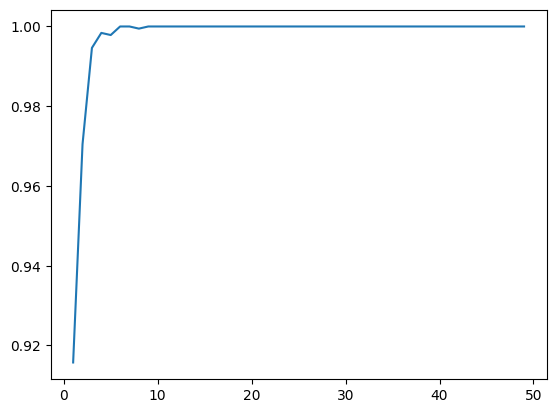

In [484]:
# definios un rango de números de 1 a 50 componentes a probar
n_features = range(1, min(X_train.shape[1], 50))
scores = []

for n in n_features:
    # 1. Aplicamos PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # 2. Entrenamos Random Forest
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pca, y_train)

    # 3. Evaluamos y guardamos el score
    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

sns.lineplot(x=n_features, y=scores)


Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




<Axes: >

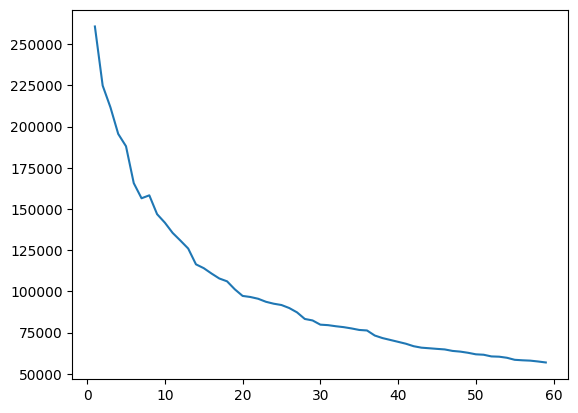

In [485]:
from sklearn.cluster import KMeans

X_scaled = X_train_scaled

scores = []
k_values = range(1, 60)
for a in k_values:
    kmeans = KMeans(n_clusters=a, random_state=42)
    kmeans.fit(X_scaled)
    scores.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=scores)

Tras visualizar esa gráfica del "método codo" decido que el codo/K mejor es el K=15, por lo que lo usamos más adelante para aplicar al conjunto de datos.

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

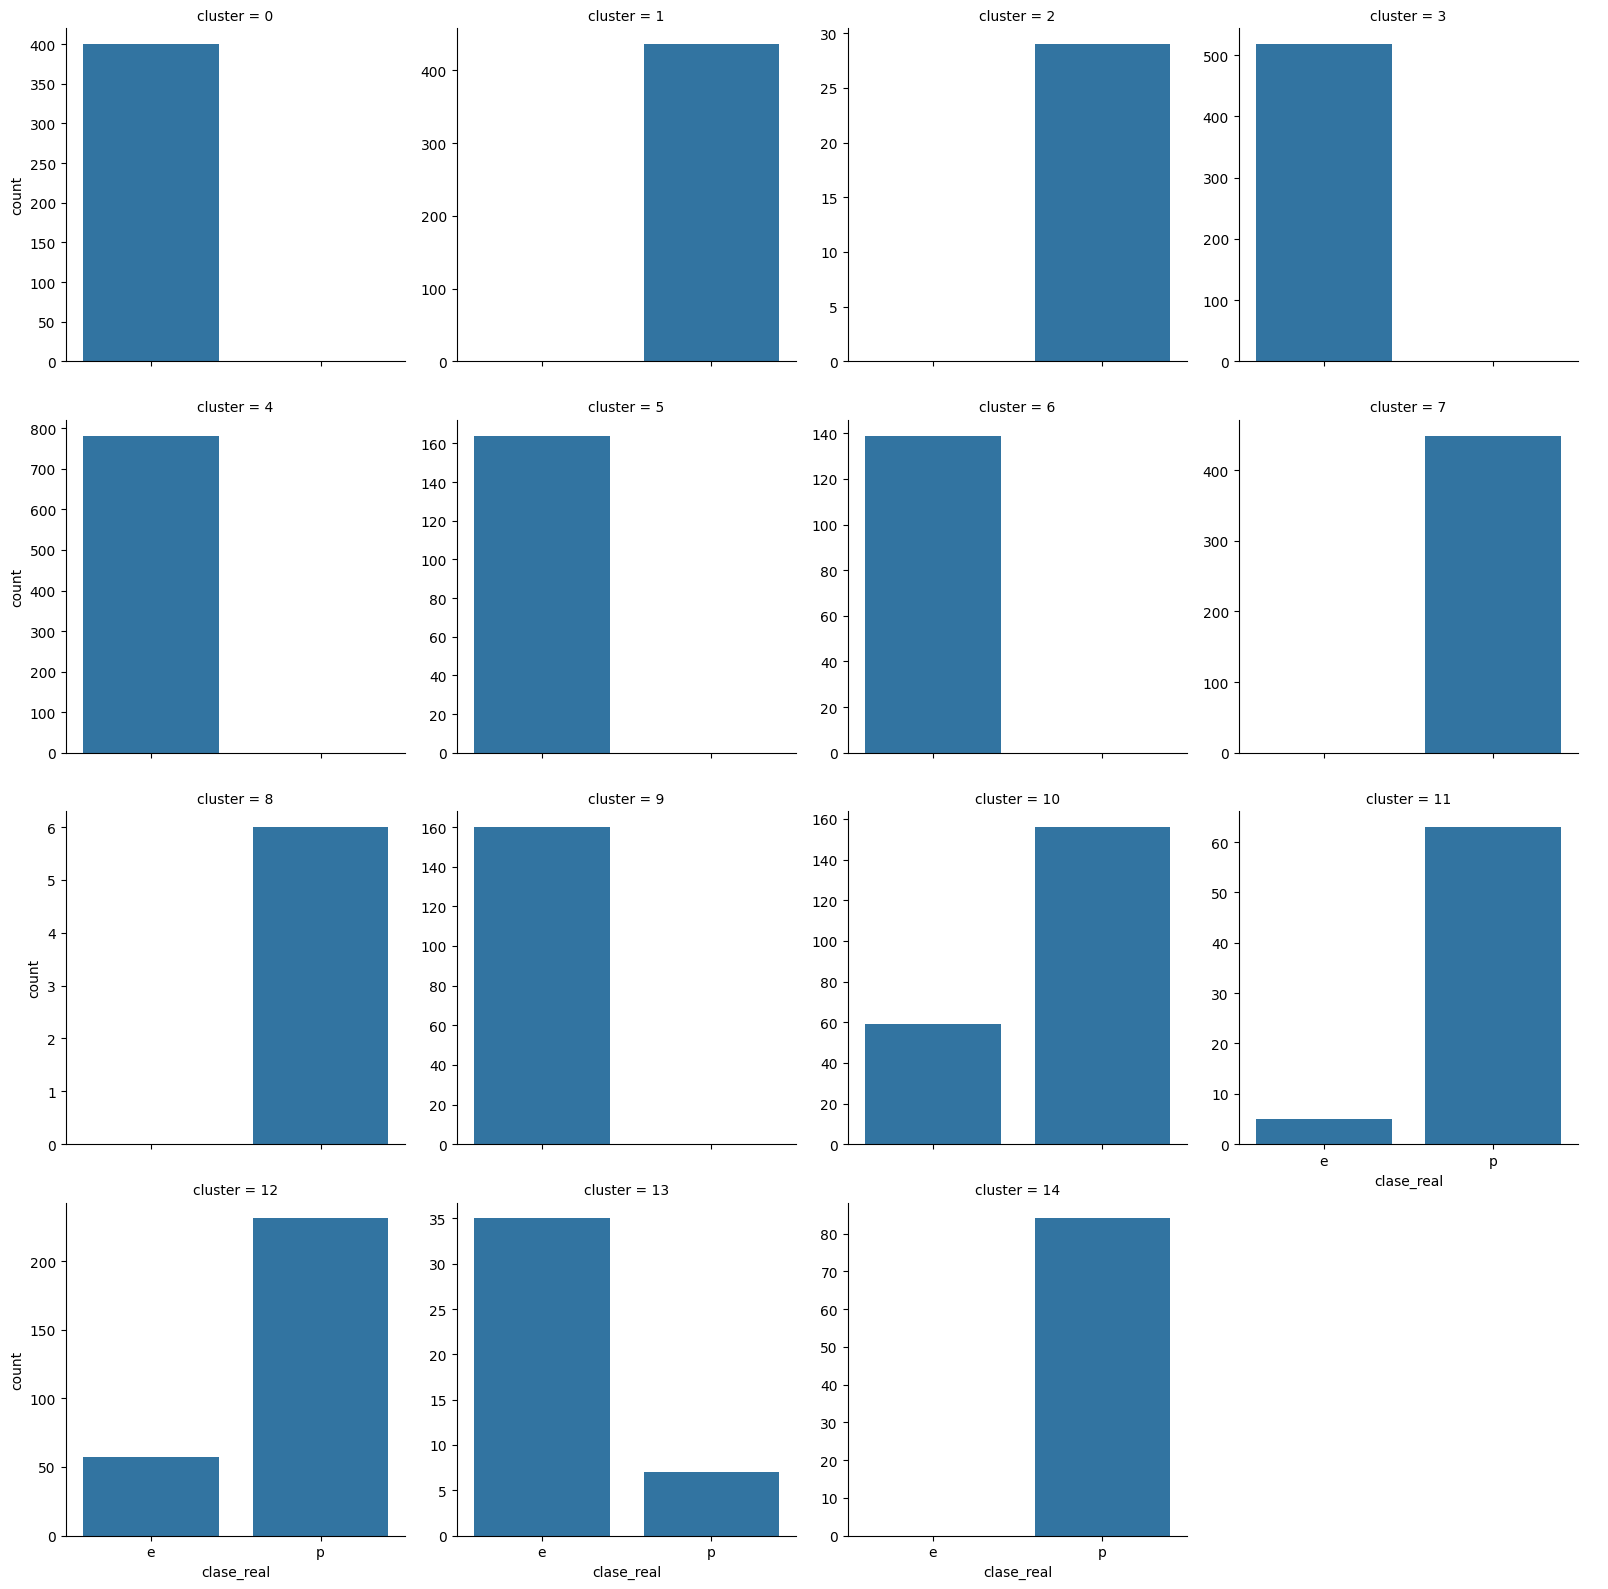

In [488]:
# Aprender Kmeans con el valor de K obtenido.
# 1. Aprender KMeans con el valor de K encontrado (15)
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(X_train_scaled)

# 2. Asignar cada punto a un cluster
cluster_labels = kmeans.predict(X_train_scaled)

# 3. Crear un DataFrame para graficar
df_plot = pd.DataFrame({
    'cluster': cluster_labels,
    'clase_real': y_train  # o le.inverse_transform(y_train) si quieres ver 'p' y 'e'
})

df_plot['clase_real'] = label_encoder.inverse_transform(y_train)


# 4. Visualizar con catplot (conteo de clases reales en cada cluster)
ax = sns.catplot(
    col='cluster',         # una columna por cada cluster
    x='clase_real',        # clases reales ('p' o 'e') en el eje x
    data=df_plot,
    kind='count',
    col_wrap=4,
    sharey=False,
    height=4
)

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

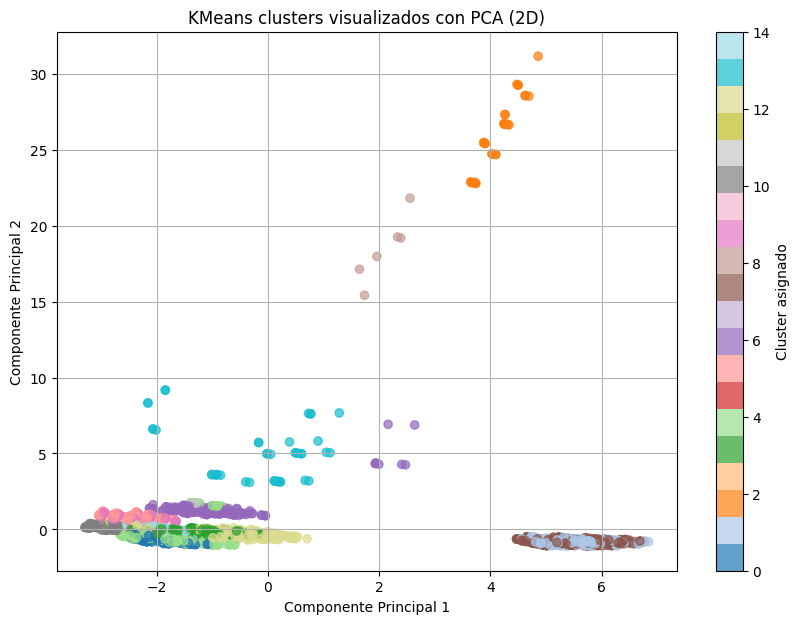

In [ ]:
# Entrenar PCA para representar y usar un color por cada cluster.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Reducimos dimensionalidad con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# 2. Aplicamos KMeans (con k=15, ya entrenado o vuelve a entrenar)
kmeans = KMeans(n_clusters=15, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# 3. Scatterplot: colores según cluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='tab20', alpha=0.7)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KMeans clusters visualizados con PCA (2D)')
plt.colorbar(scatter, label='Cluster asignado')
plt.grid(True)
plt.show()


¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.